# Çelik Endüstrisinde Enerji Tüketimi

Bu çalışmada, çelik endüstrisinde faaliyet gösteren fabrikanın elektrik tüketim verileri kullanılarak, enerji tüketimi makine öğrenmesi yöntemleriyle tahmin edilmiştir.

Veri setine [buraya tıklayarak](https://www.kaggle.com/datasets/csafrit2/steel-industry-energy-consumption/data) ulaşabilirsiniz.

Veri analizi, manipülasyonu ve görselleştirme işlemleri için gerekli kütüphaneleri import ediyoruz.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
import warnings
warnings.filterwarnings("ignore")
# Uyarı mesajlarını kapatmak için gerekli kod.

In [3]:
steel = pd.read_csv("/kaggle/input/steel-industry-energy-consumption/Steel_industry_data.csv")
df = steel.copy()
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


* Analiz edeceğimiz veri setini pandas kütüphanesi ile projeye yüklüyoruz.
* İleride yapacağımız işlemler ile orjinal veri seti üzerinde değişiklik olmaması için "df" değişkenine veri setini kopyalıyoruz.
* Son adım olarak yüklediğimiz veri setinin ilk 5 satırını görüntülüyoruz

# Exploratory Data Analysis

In [4]:
df.shape

(35040, 11)

* **df.shape** kodu veri setinin boyutunu öğrenmiş oluyoruz.
* Veri seti 35040 gözlem ve 11 sütun içermektedir.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

* **df.info()** kodu, veri setindeki satır ve sütun sayısını, sütun isimlerini, her sütunun veri tipini ve eksik veri olup olmadığını gösterir.
* Çıktılar incelendiğinde aşağıdaki bilgiler elde edilmiştir:
  1. Veri seti 11 sütun ve 35.040 satırdan oluşmaktadır.
  2. Hiçbir sütunda eksik veri bulunmamaktadır.
  3. 7 sütun sayısal (6 float64, 1 int64), 4 sütun ise kategorik (object) verilerden oluşmaktadır.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
Lagging_Current_Reactive.Power_kVarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
CO2(tCO2),35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
Lagging_Current_Power_Factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
Leading_Current_Power_Factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
NSM,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


* **df.describe()** kodu veri setinde bulunan sayısal değerlerin temel istatistiksel tablosunu gösterir.
* 

In [7]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

* **df.isnull()** fonksiyonu, veri setinde eksik değer var olup olmadığını sorgular ve boolean değerler içeren bir tablo şeklinde gösterir. Ancak büyük veri setlerinde eksik değerlerin toplam sayısını görmek daha iyi olacaktır. Bu sebeple **df.isnull().sum()** ifadesi kullanılır. Böylece her bir sütundaki eksik değerlerin sayısı doğrudan görüntülenebilir.
* Sütunlardaki eksik veri sayısı sıfırdır, yani veri setinde herhangi bir eksik değer bulunmamaktadır.
* Bu durum veri ön işleme adımlarına ihtiyaç duyulmadan modelleme sürecine geçilmesini sağlar.

## Günlük Enerji Kullanımı Grafiği

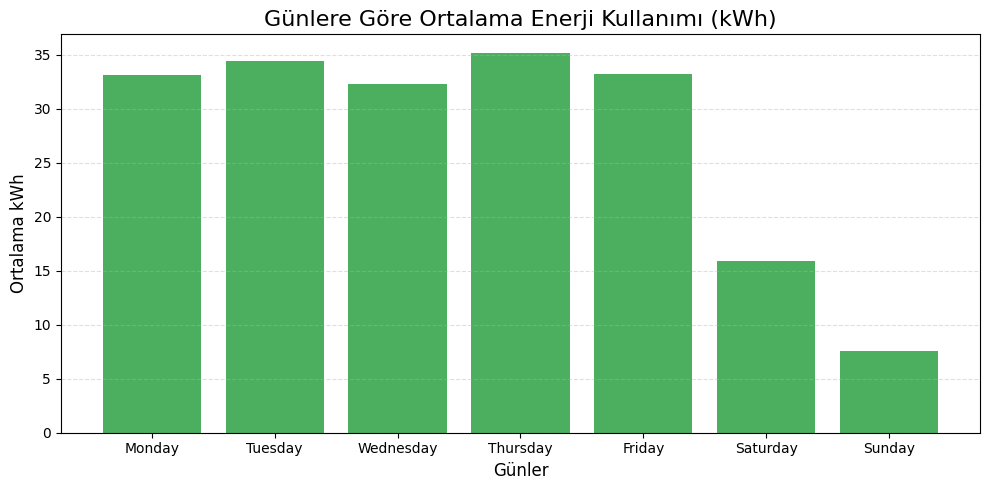

In [8]:
avg_kwh_by_day = df.groupby("Day_of_week")["Usage_kWh"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
# Veriyi haftanın günlerine göre gruplayarak günlük ortalama hesaplıyoruz. Karışıklık olmasını önlemek Günleri sıralıyoruz. 

plt.figure(figsize=(10, 5))
plt.bar(avg_kwh_by_day.index, avg_kwh_by_day.values, color="#4CAF60")
# Grafiğin boyutunu ayarlararak okunabilir olması için genişliği 10, yüksekliği 5 birim yapıyoruz.
# Sütun grafiği çizdiyoruz ve x eksenine haftanın günlerini, y eksenine ortlama enerji tüketimini yazıyoruz. 
# Grafiğin rengini renk kodu ile belirliyoruz.

plt.title("Günlere Göre Ortalama Enerji Kullanımı (kWh)", fontsize=16)
plt.xlabel("Günler", fontsize=12)
plt.ylabel("Ortalama kWh", fontsize=12)
plt.grid(axis="y", linestyle= "--", alpha=0.4)
# Grafiğin başlığını yazıyoruz ve font büyüklüğünü ayarlıyoruz.
# Grafiğin x ekseninde bulunan başlığını yazıyoruz ve font büyüklüğünü ayarlıyoruz.
# Grafiğin y ekseninde bulunan başlığını yazıyoruz ve font büyüklüğünü ayarlıyoruz.
# Değerlerin rahat görülebilmesi için y eksenine hizalı çizgi ekliyoruz. Çizgi tipi ve saydamlık ayarı yapıyoruz.

plt.tight_layout()
plt.show();
# Grafik elemanları arasındaki boşluğu otomatik ayarlıyoruz.
# Grafiği ekrana yazdırıyoruz.

* Hafta içi enerji tüketimi oldukça yüksektir.
* Perşembe günü en yüksek ortalama tüketime sahip gündür.
* Cumartesi ve pazar günü tüketim keskin bir şekilde düşmektedir.
* Pazar günü ise en düşük ortalama enerji tüketiminin olduğu gündür.

## Aylık Ortalama Enerji Tüketimi Grafiği

In [9]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["Month"] = df["date"].dt.month_name()
# Veri setindeki "date" sütunundaki verileri tarih biçimine çeviriyoruz. 
# Veri setine tarihlerin karşılığı olan ayların adını yazmak için yeni sütun oluşturuyoruz.

monthly_avg = df.groupby("Month")["Usage_kWh"].mean().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"])
# Verileri "Month" sütununa göre grupluyoruz ve her ayın ortalama enerji tüketiminin ortalamasını hesaplıyoruz.

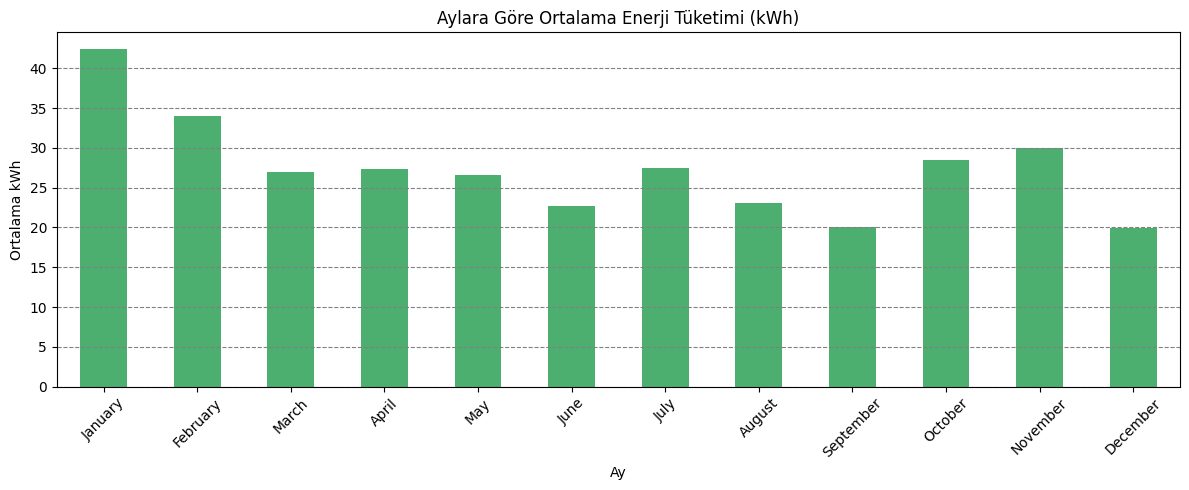

In [10]:
plt.figure(figsize=(12, 5))
monthly_avg.plot(kind='bar', color="#4CAF70")
# Grafiğin boyutunu ayarlıyoruz.
# Bar grafik çizdiriyor ve grafiğin rengini belirliyoruz.

plt.title("Aylara Göre Ortalama Enerji Tüketimi (kWh)")
plt.ylabel("Ortalama kWh")
plt.xlabel("Ay")
# Grafiğin başlığını yazıyoruz.
# Grafiğin y ekseninde bulunan başlığını yazıyoruz.
# Grafiğin x ekseninde bulunan başlığını yazıyoruz.

plt.xticks(rotation=45)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.8)
# Ay isimlerinin 45 derece eğik görünmesini sağlıyoruz.
# Değerlerin rahat görülebilmesi için y eksenine hizalı çizgi ekliyoruz. Çizgi tipi ve kalınlık ayarı yapıyoruz.

plt.tight_layout()
plt.show();
# Grafik elemanları arasındaki boşluğu otomatik ayarlıyoruz.
# Grafiği ekrana yazdırıyoruz. 

* En yüksek enerji tüketimi Ocak (January) ayında gerçekleşmiştir.
* Haziran (June), Ağustos (August) ve Eylül (September) aylarında enerji tüketimi düşük seyrediyor. Eylül ayı en düşük ortalama tüketime sahip.
* Özetle bu grafik enerji tüketiminin mevsimlere bağlı olarak dalgalandığını göstermektedir.

## Yük Tiplerine Göre Enerji Kullanımı ve Dağılımı

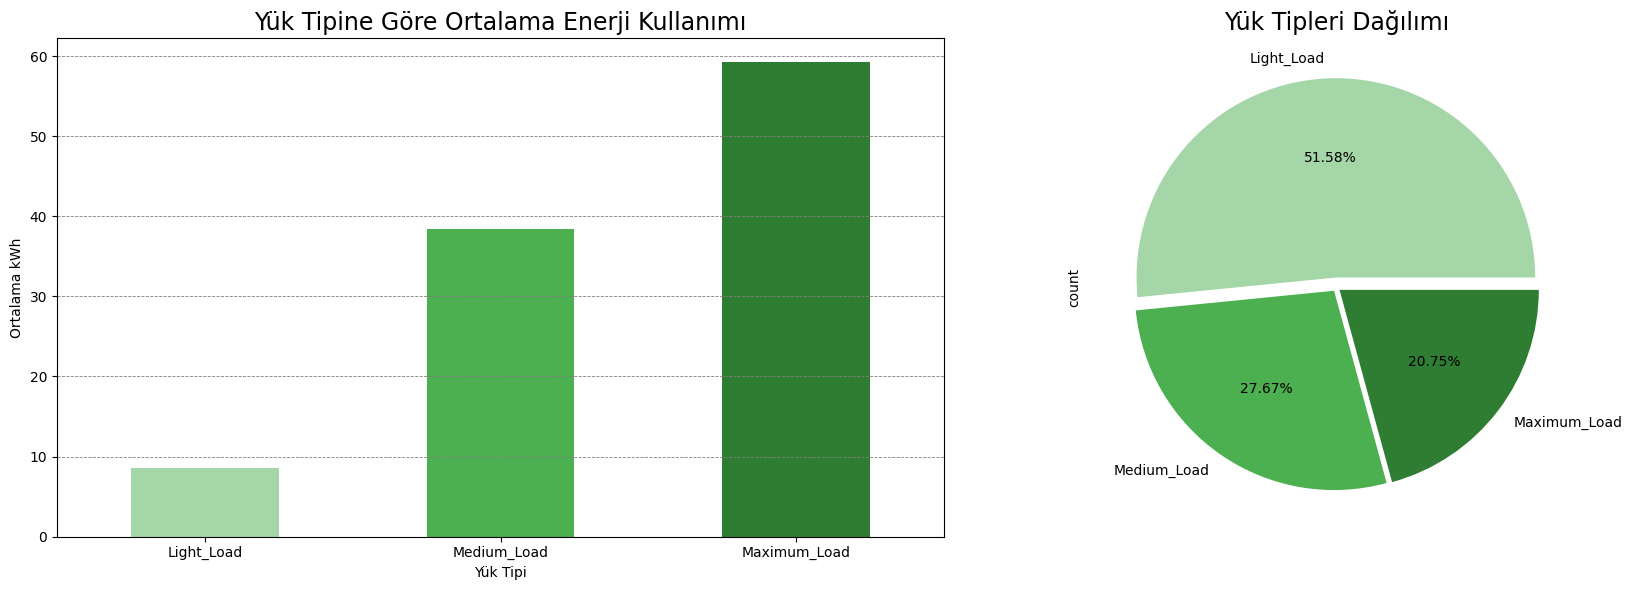

In [11]:
colors = ["#A5D6A7", "#4CAF50", "#2E7D32"]
# Üç farklı renk kodu belirliyoruz. Bu renk paleti grafiklerde kullanılacak. 

plt.figure(figsize=(18,6))
# Grafiğin boyutunu ayarlıyoruz.

plt.subplot(1,2,1)
df.groupby("Load_Type")["Usage_kWh"].mean().loc[["Light_Load", "Medium_Load", "Maximum_Load"]].plot(kind="bar", color=colors)
# 1 satır 2 sütunluk grafik alanı oluşturuyoruz ve sol taraftaki grafiği çizdirmek için seçiyoruz.
# Verileri yük tiplerine göre gruplandırıyoruz. Her grubun enerji kullanımının ortalamasını alıyoruz. Yük sıralamasını yapıyoruz.
# Son olarak bar grafiğini çizdiriyoruz ve renk ayarlamasını yapıyoruz.

plt.title("Yük Tipine Göre Ortalama Enerji Kullanımı", fontsize=17)
plt.ylabel("Ortalama kWh")
plt.xlabel("Yük Tipi")
plt.xticks(rotation=0)
plt.grid(axis="y", color="gray", linestyle="--", linewidth=0.6)
# Grafiğin başlığını yazıyoruz.
# Grafiğin y ekseninde bulunan başlığını yazıyoruz.
# Grafiğin x ekseninde bulunan başlığını yazıyoruz. 
# x eksenideki yazıların yatay olmasını sağlıyoruz.
# Değerlerin rahat görülebilmesi için y eksenine hizalı çizgi ekliyoruz. Çizgi tipi ve çizginin kalınlık ayarını yapıyoruz.

plt.subplot(1,2,2)
df["Load_Type"].value_counts().plot.pie(explode=[0.05,0.02,0.02], autopct="%1.2f%%", colors=colors)
plt.title("Yük Tipleri Dağılımı", fontsize=17)
# Grafik alanının sağ tarafındaki grafiği çizdirmek için seçiyoruz.
# Hangi yük tipinden kaç tane olduğu sayılıyor. Pie grafiği çizdiriyoruz ve paylar arası boşluk olmasını sağlıyoruz.
# Ayrıca grafik üzerinde değerlerin basamak ayarını yapıyoruz ve son olarak renk ataması yapıyoruz. 
# Grafiğin başlığını yazıyoruz ve font büyüklüğünü ayarlıyoruz.

plt.tight_layout()
plt.show();
# Grafik elemanları arasındaki boşluğu otomatik ayarlıyoruz.
# Grafiği ekrana yazdırıyoruz. 

* **Yük Tipine Göre Enerji Kullanımı**
  * Yük tipi arttıkça enerji tüketimi şekilde artıyor. Bu, sistemin yük arttıkça daha fazla enerjiye ihtiyaç duyduğunu söyleyebiliriz.
* **Yük Tipleri Dağılımı**
  * Hafif yük durumu en sık karşılaşılan yük tipidir.
* Light_Load en sık karşılaşılan yük tipi ama enerji tüketimi düşük.
* Maximum_Load daha az sayıda olmasına rağmen birim başına en fazla enerji harcayan yük tipi.
* Sonuç olarak sistemin en büyük enerji yükü, az sayıdaki ama yoğun yüklenmelerden kaynaklanıyor.

## Gün / Yük Tipi ve Ortalama Tüketim

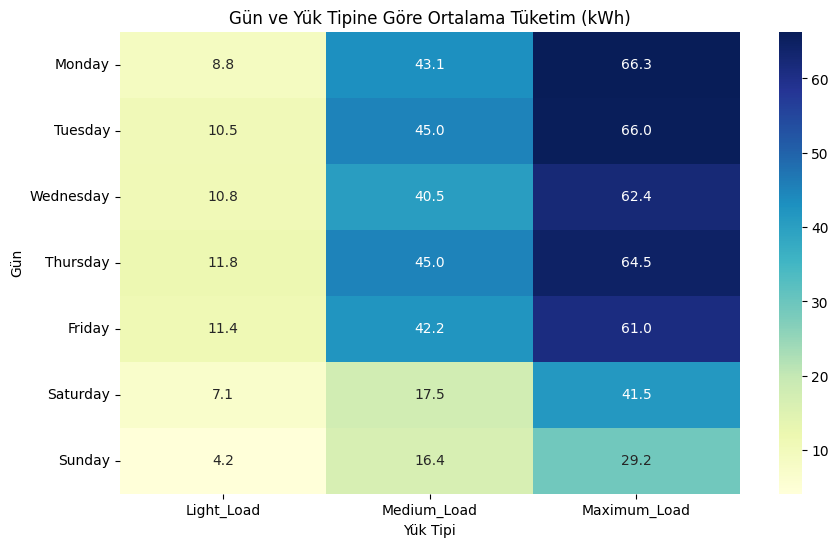

In [12]:
pivot_table = df.pivot_table(index="Day_of_week", columns="Load_Type", values="Usage_kWh", aggfunc="mean")
# Verileri düzenlemek için pivot tablo oluşturuyorz. Satırları günler, sütunları yük tipine göre ayarlıyoruz.
# Bütün hücrelerdeki sütunda enerji kullanımı değeri olacak şekilde ayarlıyoruz.
# Son olarak aynı gün ve yük tipi varsa ortalamasını aldırıyoruz.

pivot_table = pivot_table[["Light_Load", "Medium_Load", "Maximum_Load"]]
# Sütun sırasını belirli bir sıraya göre yeniden düzenliyoruz.

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table.reindex(ordered_days)
# Günleri haftalık sıraya göre düzenliyoruz.

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
# Grafiğin boyutunu ayarlıyoruz.
# Isı haritası oluşturuyoruz. Hücrelerin içine verilerin yazılmasını sağlıyoruz ve virgül ayarı yapıyoruz.

plt.title("Gün ve Yük Tipine Göre Ortalama Tüketim (kWh)")
plt.xlabel("Yük Tipi")
plt.ylabel("Gün")
plt.show();
# Grafiğin başlığını yazıyoruz.
# Grafiğin x ekseninde bulunan başlığını yazıyoruz.
# Grafiğin y ekseninde bulunan başlığını yazıyoruz.
# Grafiği ekrana yazdırıyoruz.

* Elektrik tüketimi haftaiçinde daha yüksek.
* Pazar günü en düşük enerji tüketimi olan gün.
* Maksimum yük günleri Pazartesi, Salı ve Perşembe günleriyle öne çıkıyor.

## Günün Saatine Göre Ortalama Elektrik Tüketimi

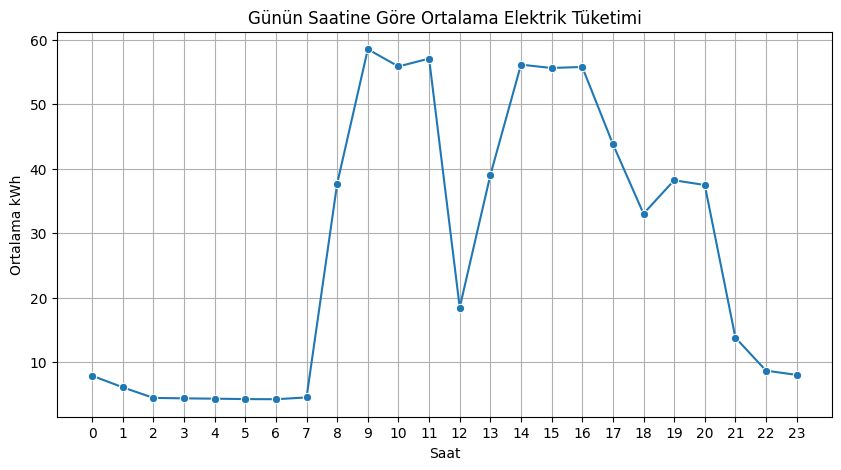

In [13]:
df["Hour"] = (df["NSM"] // 3600).astype(int)
# "Hour" adında yeni sütun oluşturuyoruz. "NSM" sütunudaki saniyeleri saat cinsine çeviriyoruz. 

hourly_avg = df.groupby("Hour")["Usage_kWh"].mean().reset_index()
# Veriyi saatlere göre grupluyoruz ve her saatteki elektrik grubunun ortalamasını alıyoruz.

plt.figure(figsize=(10, 5))
# Grafiğin boyutunu ayarlıyoruz.

sns.lineplot(data=hourly_avg, x="Hour", y="Usage_kWh", marker="o")
# Çizgi grafiğini çizdiriyoruz.

plt.title("Günün Saatine Göre Ortalama Elektrik Tüketimi")
plt.xlabel("Saat")
plt.ylabel("Ortalama kWh")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show();
# Grafiğin başlığını yazıyoruz.
# Grafiğin x ekseninde bulunan başlığını yazıyoruz.
# Grafiğin y ekseninde bulunan başlığını yazıyoruz.
# X ekseninde 0’dan 23’e kadar sayıları gösteriyoruz.
# Değerlerin rahat görülebilmesi için çizgi ekliyoruz.
# Grafiği ekrana yazdırıyoruz.

* İki ana üretim dönemi var: Sabah 9–12 ve Öğleden sonra 13–17.
* Öğle arasında belirgin düşüş var.
* Gece üretimi zayıf. 

## Haftalık Ortalama Enerji Kullanımı ve CO₂ Miktarı

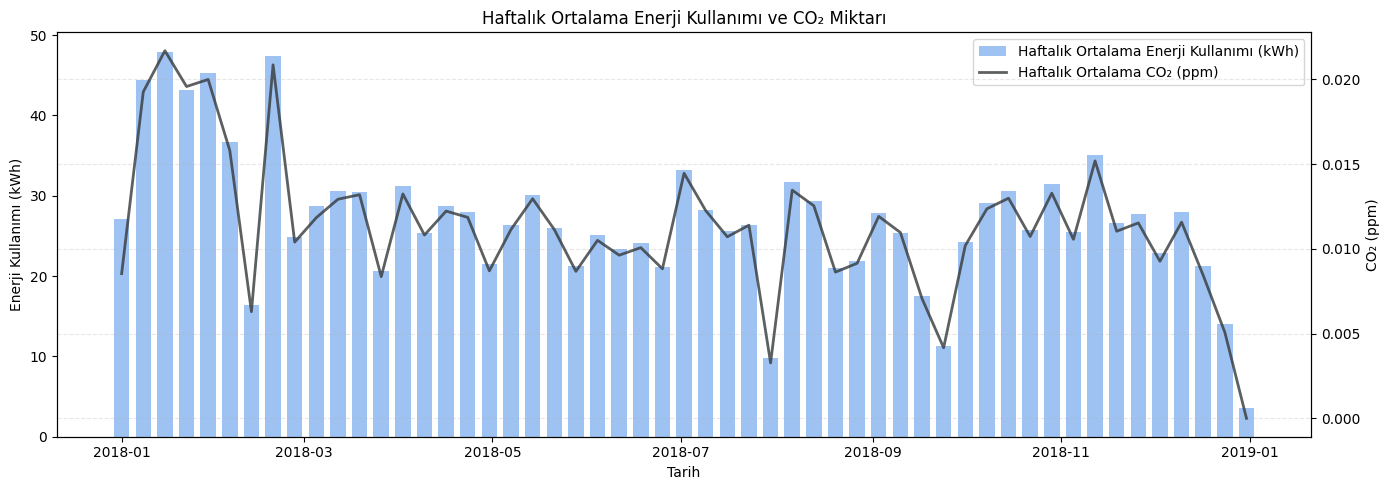

In [14]:
weekly_usage = df.groupby(df["date"].dt.to_period("W"))["Usage_kWh"].mean().reset_index()
weekly_usage["date"] = weekly_usage["date"].dt.start_time
# Tarih sütununu haftalık periyoda dönüştürüyoruz. Enerji tüketimine göre gruplandırıp ortalamasını alıyoruz.
# Son olarak haftalık periyotun başlangıç tarihini "date" sütununa atıyoruz.

weekly_co2 = df.groupby(df["date"].dt.to_period("W"))["CO2(tCO2)"].mean().reset_index()
weekly_co2["date"] = weekly_co2["date"].dt.start_time
# Haftalık ortalama CO₂ miktarını hesaplıyoruz.

fig, ax1 = plt.subplots(figsize=(14, 5))
# Grafik alanı oluşturuyoruz

ax1.bar(weekly_usage["date"], weekly_usage["Usage_kWh"], width=5, color="#5D9CEC", alpha=0.6, label="Haftalık Ortalama Enerji Kullanımı (kWh)")
ax1.set_xlabel("Tarih")
ax1.set_ylabel("Enerji Kullanımı (kWh)", color="black")
#ax1.bar() ile bar grafiği çiziyoruz. x ekseninde haftalık tarih bilgisi ,y ekseninde enerji kullanımı ortalaması yazdırıyoruz.
#Barların genişliğini, rengini ve saydamlığını ayarlıyoruz.

ax2 = ax1.twinx()
ax2.plot(weekly_co2["date"], weekly_co2["CO2(tCO2)"], color="#353839", alpha=0.8, label="Haftalık Ortalama CO₂ (ppm)", linewidth=2)
ax2.set_ylabel("CO₂ (ppm)", color="black")
#ax1.twinx() ile aynı grafik üzerinde ama farklı bir y ekseni oluşturuyoruz.
#y ekseninde haftalık CO₂ miktarının çizgi grafiğini çiziyoruz.
#Rengini ayarlıyoruz ve eksen ismini belirliyoruz.

plt.title("Haftalık Ortalama Enerji Kullanımı ve CO₂ Miktarı")
# Grafiğin başlığını yazıyoruz.

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")
#Her iki eksendeki açıklamaları alıyoruz.
#Sonra bunları birleştirip, sağ üst köşeye yerleştiriyoruz.

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
# Değerlerin rahat görülebilmesi için y eksenine hizalı çizgi ekliyoruz. Çizgi tipi ve saydamlık ayarı yapıyoruz.
# Grafik elemanları arasındaki boşluğu otomatik ayarlıyoruz.
# Grafiği ekrana yazdırıyoruz.

## Dağılım Grafikleri

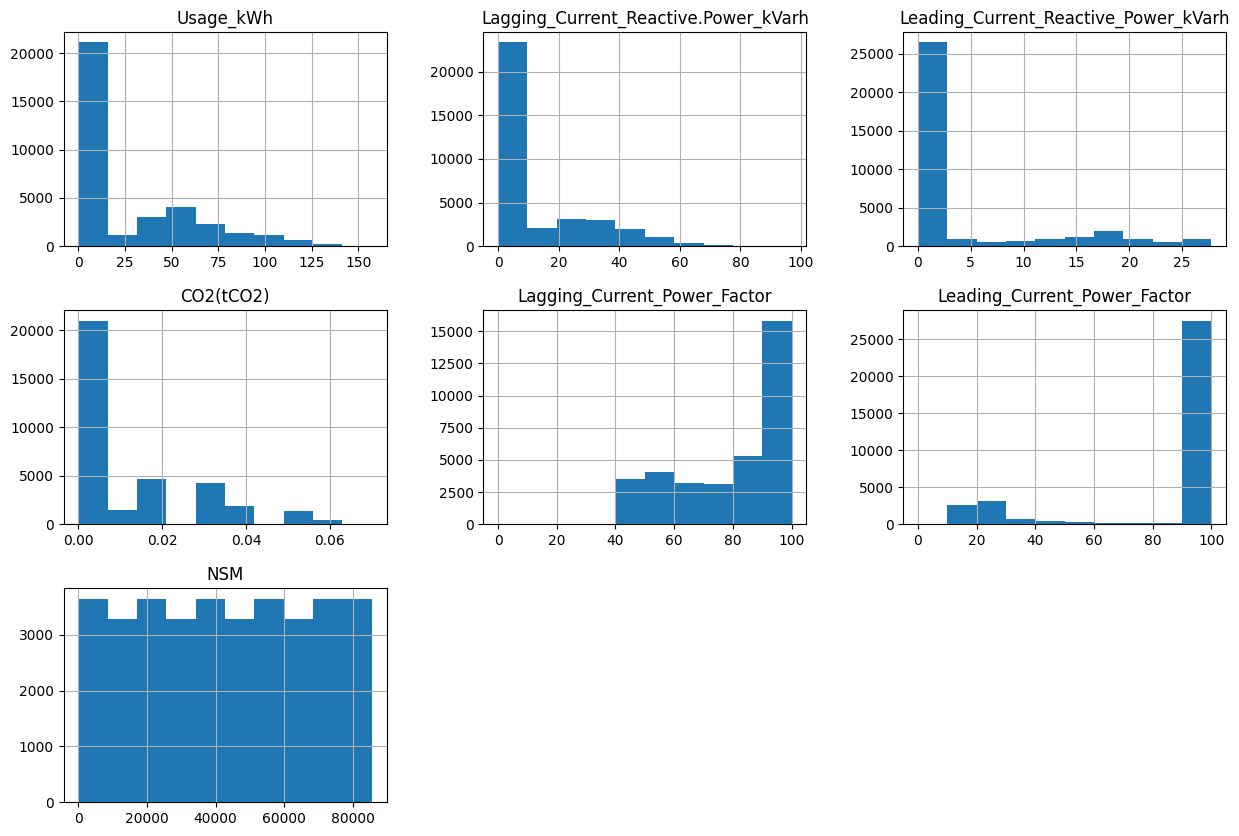

In [15]:
df_dist = df.drop(columns=["date", "Hour"], axis=1)
# "date" ve "Hour" kolonunu siliyoruz.

df_dist.hist(figsize = (15,10))
# Sayısal verilerin histogram grafiğini oluşturuyoruz.

plt.show();
# Grafiği ekrana yazdırıyoruz.

# Model Hazırlama

## Label Encoding ve One Hot Encoding

Encoding işlemlerini gerçekleştirebilmek için gerekli kütüphaneyi import ediyoruz.

In [16]:
from sklearn import preprocessing

In [17]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder(sparse_output=False)

In [18]:
df['WeekStatus_encoded'] = le.fit_transform(df['WeekStatus'])

* *WeekStatus* sütununa encoding işlemi uyguladık.

In [19]:
load_type_encoded = ohe.fit_transform(df[['Load_Type']])
encoded_columns = ohe.get_feature_names_out(['Load_Type'])
df_encoded = pd.DataFrame(load_type_encoded, columns=encoded_columns, index=df.index)
df = pd.concat([df, df_encoded], axis=1)

* *Load_Type* sütununa encoding işlemi uyguladık.

In [28]:
# day_of_week_encoded = ohe.fit_transform(df[['Day_of_week']])
# encoded_columns = ohe.get_feature_names_out(['Day_of_week'])
# df_encoded = pd.DataFrame(day_of_week_encoded, columns=encoded_columns)
# df = pd.concat([df, df_encoded], axis=1) 

Not: Korelasyon matrisinde yapılan incelemeye göre **Usage_kWh** üzerindeki etkisi düşük olduğundan dolayı encode işlemi yapılmamıştır.

In [21]:
df = df.set_index('date')

dataframe'in index'ini date sütunu yaptık

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2018-01-01 00:15:00 to 2018-12-31 00:00:00
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
 10  Month                                 35040 non

In [23]:
df = df.drop(["Day_of_week", "WeekStatus", "Load_Type", "Month", "Hour", ], axis=1)

- Grafikleri oluştururken eklediğimiz sütunları ve modelde kullanmayacağımız sütunları df'den siliyoruz.

## Korelasyon Matrisi ve Özellik Seçimi

- Korelasyon değeri:
  - +1 → çok güçlü pozitif ilişki (ikisi birlikte artar),
  - 0 → ilişki yok,
  - -1 → çok güçlü negatif ilişki (biri artarken diğeri azalır).

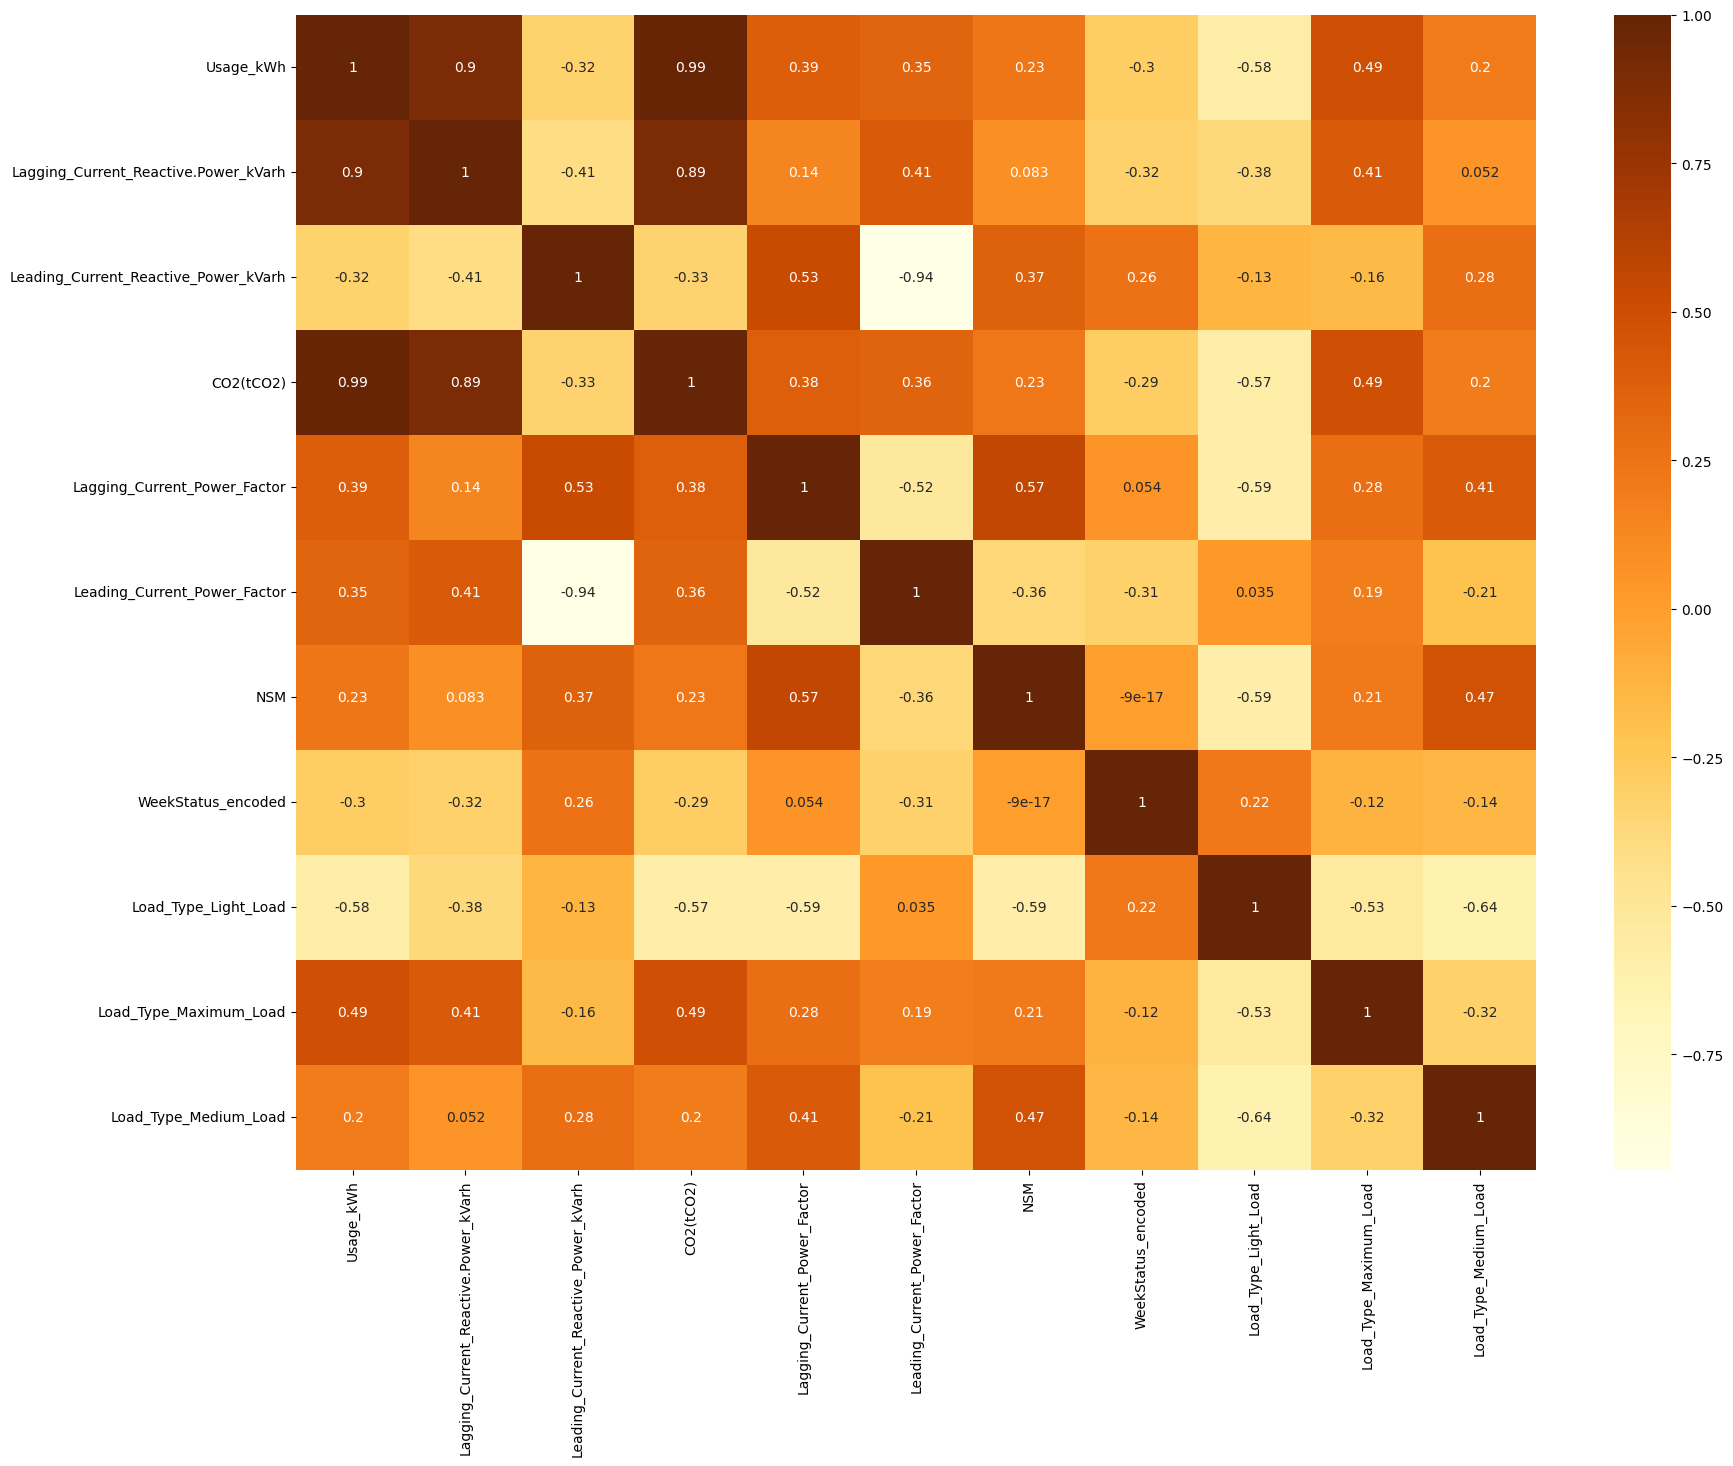

In [29]:
corr_matrix = df.corr()
# Sayısal sütunların diğer sütunlarla olan korelasyon katsayısını hesaplıyoruz.

plt.figure(figsize=(20,15))
# Grafiğin boyutunu ayarlıyoruz.

sns.heatmap(corr_matrix, annot=True, cmap="YlOrBr")
plt.show();
# Hesapladığımız korelasyon matrisinin renkli ısı haritasını çizdiriyoruz.

In [33]:
cor_target = abs(corr_matrix["Usage_kWh"])
relevant_features = cor_target[cor_target>0.1]
relevant_features
#"Usage_kWh" sütunu ile diğer sütunlar arasındaki korelasyonları alıyoruz.
# Mutlak değerini alarak pozitif veya negatif ilişkileri şiddetine göre inceliyoruz.
# 0.1'den büyük olanları "relevant_features" değişkeninde saklıyoruz.

Usage_kWh                               1.000000
Lagging_Current_Reactive.Power_kVarh    0.896150
Leading_Current_Reactive_Power_kVarh    0.324922
CO2(tCO2)                               0.988180
Lagging_Current_Power_Factor            0.385960
Leading_Current_Power_Factor            0.353566
NSM                                     0.234610
WeekStatus_encoded                      0.295475
Load_Type_Light_Load                    0.578921
Load_Type_Maximum_Load                  0.487792
Load_Type_Medium_Load                   0.204521
Name: Usage_kWh, dtype: float64

CO2(tCO2) ve Lagging_Current_Reactive.Power_kVarh ile güçlü ilişki olduğunu söyleyebiliriz. 

In [34]:
to_drop = cor_target[cor_target<0.1]
to_drop_frame = to_drop.to_frame()
# Korelasyon değeri 0.1'den düşük olanları seçiyoruz

row_names = to_drop_frame.index
row_names_list = list(row_names)
row_names_list.append("Usage_kWh")
# Korelayonu düşük olan sütunların isimlerini alıyoruz.
# Listeye çeviriyoruz
# Son olarak listeye tahminleme yapacağımız "Usage_kWh" sütununu dahil ediyoruz.

y = df['Usage_kWh'].values
X = df.drop(row_names_list, axis=1).values
# y değişkenine tahmin edeceğimiz sütunu ekliyoruz.
# Modelin kullanacağı girdileri oluşturuyoruz. 

## Regresyon Modelleri

Makine öğrenmesinde kullanacağımız kütüphaneleri import ediyoruz.

In [35]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [36]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
# Veri setindeki değerleri ölçeklendirmek için min-max scaler kullanıyoruz.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Modelin %20'sini test, %80'ini eğitim verisi olarak bölüyoruz.

* X_train -> Modelin öğrenmesi için
* X_test  -> Modelin denemesi için
* y_train -> Modelin hedefi öğrenmesi için
* y_test  -> Modelin başarısını ölçmek için

In [40]:
results = []

models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('XGBRegressor', XGBRegressor()),
    ('SVR', SVR())
]

* Modelin başarı sonuçlarını eklemek için boş liste oluşturuyoruz
* Kullanacağımız modeller için liste oluşturuyoruz.

In [41]:
for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    duration_min = (end_time - start_time) / 60
    score = model.score(X_test, y_test)

    results.append((name, score, duration_min))

- Çoklu model eğitimi için for döngüsü kullanıyoruz.
- Döngü modelin ismini alır, o modeli eğitmeye başlar. Bu arada kullandığımız time fonksiyonu ile o modeli ne kadar sürede eğittiğini hesaplar ve listeye ekler.

In [48]:
for name, score, duration in results:
    total_seconds = duration * 60
    minutes = int(total_seconds // 60)
    seconds = total_seconds % 60
    print(f"{name}: R² Score = {score:.4f} | Fit Süresi = {seconds:.5f} sn")

LinearRegression: R² Score = 0.9843 | Fit Süresi = 0.04546 sn
Ridge: R² Score = 0.9843 | Fit Süresi = 0.00842 sn
Lasso: R² Score = 0.9650 | Fit Süresi = 0.01602 sn
KNeighborsRegressor: R² Score = 0.9950 | Fit Süresi = 0.09078 sn
RandomForestRegressor: R² Score = 0.9991 | Fit Süresi = 10.20607 sn
GradientBoostingRegressor: R² Score = 0.9926 | Fit Süresi = 3.14061 sn
XGBRegressor: R² Score = 0.9991 | Fit Süresi = 0.29568 sn
SVR: R² Score = 0.9870 | Fit Süresi = 33.92894 sn


- Modellerin R^2 skorunu ve fit süresini yazdırıyoruz.

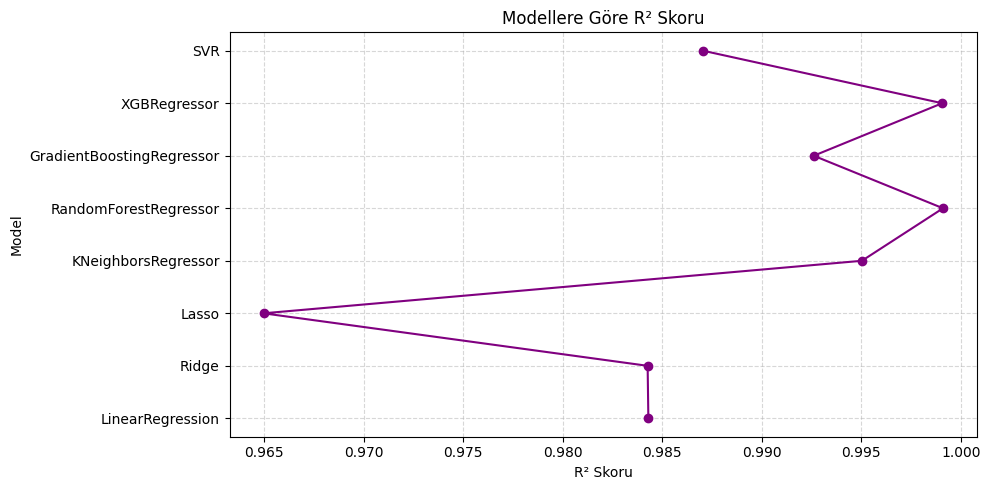

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(df_results['R2_Score'], df_results.index, marker='o', linestyle='-', color='purple')
plt.xlabel('R² Skoru')
plt.ylabel('Model')
plt.title('Modellere Göre R² Skoru')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# Grafiğin boyutunu ayarlıyoruz.
# x ve y ekseninde gösterilecek değerleri seçiyoruz. 
# Grafiğin x ekseninde bulunan başlığını yazıyoruz.
# Grafiğin y ekseninde bulunan başlığını yazıyoruz.
# Grafiğin başlığını yazıyoruz.
# Değerlerin rahat görülebilmesi için çizgi ekliyoruz.
# Grafik elemanları arasındaki boşluğu otomatik ayarlıyoruz.
# Grafiği ekrana yazdırıyoruz. 

* **Modellerin R^2 Skoruna Göre İlk 3 Sıralaması**
1. RandomForestRegressor: 0.9991
2. XGBRegressor: 0.9991
3. KNeighborsRegressor: 0.9950

- Modellerin başarısını eğitim/test bölmesiyle değerlendirmek yerine cross validation yaparak ölçmek daha sağlıklıdır. 
- Bu yüzden gerekli kütüphaneyi import ediyoruz

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
cv_results = []

for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    cv_results.append((name, mean_score, std_score))

df_cv = pd.DataFrame(cv_results, columns=['Model', 'Mean_R2_Score', 'Std_Dev'])
df_cv = df_cv.set_index('Model')
print(df_cv.sort_values('Mean_R2_Score', ascending=False))

# Tüm modellerin sonuçlarını ekleyeceğimiz boş liste oluşturuyoruz.
# Daha önce tanımladığımız model listesi üzerinden modellere ulaşıyoruz.
# X ve y verisiyle 5 katlı cross validation yapıyoruz.
# Her model için 5 farklı skor çıkıyor. Bu skorların ortalamasını alıyoruz.
# Ayrıca skorların standart sapmasınıda hesaplıyoruz.
# Her modelin adı, ortalama skoru ve std sapmasını listeye ekliyoruz.
# Sonuçları df dönüştürüyoruz.
# Son olarak R^2 skoruna göre sıralama yapıp sonucu yazdırıyoruz.

                           Mean_R2_Score   Std_Dev
Model                                             
XGBRegressor                    0.995644  0.006899
RandomForestRegressor           0.993284  0.012020
KNeighborsRegressor             0.989437  0.008666
GradientBoostingRegressor       0.988407  0.008138
SVR                             0.984161  0.009308
Ridge                           0.980832  0.009910
LinearRegression                0.980831  0.009976
Lasso                           0.960263  0.014466


- Cross validation, modeli daha güvenilir test etme yöntemidir.
  - Ortalama skor = modelin genel başarısı
  - Standart sapma = modelin farklı veri bölümlerindeki tutarlılığı

- Oluşan tabloya göre XGBRegressor ortalama R^2 skoruna göre diğer bütün modellere göre en iyisidir. Standart sapmasının düşük çıkması modelin tutarlı çalışması anlamına gelmektedir.

- Tabloda ikinci sırada bulunan RandomForestRegressor ile devam edeceğiz.
- Over fitting'e karşı dayanıklı olması, karmaşık ilişkileri öğrenme konusunda başarılı olması bu kararda etkendir.

## Random Forest 

RandomForestRegressor modelini daha önce herhangi bir ayar yapmadan eğitmiştik. Bu bölümde ise GridSearch kullanarak modeli iyileştirip iyileştiremeyeceğimizi inceleyeceğiz.

Bu nedenle gereken kütüphaneyi import ediyoruz.

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
rf_params = {'max_depth': [10, 15, 20], # Ağaçların maksimum derinliği 
             'max_features': [3, 5, 10, 15], # Her ağaç için kullanılacak maksimum özellik
             'n_estimators': [50, 100, 200] # Oluşturulacak ağaç sayısı
            } 

rf_model = RandomForestRegressor(random_state=42)
# Rasgeleliği sağlamak için random_state kullandık.

In [57]:
rf_cv_model = GridSearchCV(rf_model,  # Hangi modeli test edeceğiz?
                           rf_params, # Hangi ayarları deneyeceğiz?
                           cv=5,      # 5 katlı çapraz doğrulama
                           n_jobs=-1, # Tüm işlemcileri kullan
                           verbose=2   # Çalışırken hangi işlemlerin yapıldığını göster
                          )
# Daha önce tanımladığımız RandomForestRegressor modelini, farklı parametre kombinasyonlarıyla
# deneyip en iyi sonucu bulacak şekilde ayarlıyoruz.

In [58]:
start = time.time()
rf_cv_model.fit(X_train, y_train)
end = time.time()
# Modeli eğitmeye başlıyoruz.
# Modelin eğitim süresini ölçüyoruz.

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [59]:
print("En iyi parametreler:", rf_cv_model.best_params_)
print("En iyi cross-validation R2 skoru:", rf_cv_model.best_score_)
# GridSearch sonucunda çıkan en iyi parametreleri yazdırıyoruz.
# Cross validation sonucunda ortalama R^2 skorunu yazdırıyoruz.

best_rf = rf_cv_model.best_estimator_
test_score = best_rf.score(X_test, y_test)
print(f"Eğitim süresi: {end - start:.2f} saniye")
print("Test seti R2 skoru:", test_score)
# En iyi parametrelerle eğitilmil modeli kaydediyoruz.
# Test verisi üzerinde R^2 skorunu elde ediyoruz ve yazdırıyoruz.
# Modelin eğitim süresini yazdırıyoruz.

En iyi parametreler: {'max_depth': 20, 'max_features': 10, 'n_estimators': 200}
En iyi cross-validation R2 skoru: 0.9989367825227651
Eğitim süresi: 409.19 saniye
Test seti R2 skoru: 0.9990766302667596
[CV] END ......max_depth=10, max_features=3, n_estimators=50; total time=   1.3s
[CV] END ......max_depth=10, max_features=3, n_estimators=50; total time=   1.6s
[CV] END .....max_depth=10, max_features=3, n_estimators=100; total time=   2.6s
[CV] END .....max_depth=10, max_features=3, n_estimators=200; total time=   5.2s
[CV] END ......max_depth=10, max_features=5, n_estimators=50; total time=   1.9s
[CV] END ......max_depth=10, max_features=5, n_estimators=50; total time=   1.8s
[CV] END .....max_depth=10, max_features=5, n_estimators=100; total time=   3.7s
[CV] END .....max_depth=10, max_features=5, n_estimators=200; total time=   8.3s
[CV] END .....max_depth=10, max_features=10, n_estimators=50; total time=   3.4s
[CV] END .....max_depth=10, max_features=10, n_estimators=50; total ti

- Model için en iyi parametreler:
  - max_depth=20
  - max_features=10
  - n_estimators=200
- Modelin eğitim verisinin farklı bölümler üzerinde yaptığı tahminlerin doğruluk oranı: %99.9
- GridSearch eğitim süresi: yaklaşık 7 dakika
- Test seti R^2 Skoru: 0.9991
  - Yani model daha önce görmediği test verisinde yüksek başarı gösteriyor.
  - Model iyi öğrenmiş ve genelleme yeteneği iyi seviyede

- GridSearch sonucunda öğrendiğimiz parametrelerle modeli son kez eğitiyoruz.

In [62]:
rf_tuned = RandomForestRegressor(max_depth=20,
                                 max_features=10,
                                 n_estimators=200)

In [63]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=200)

In [69]:
y_pred = rf_tuned.predict(X_test)
# Test verisindeki özellikleri kullanarak, modelin tahmin ettiği sonuçları üretiyoruz.

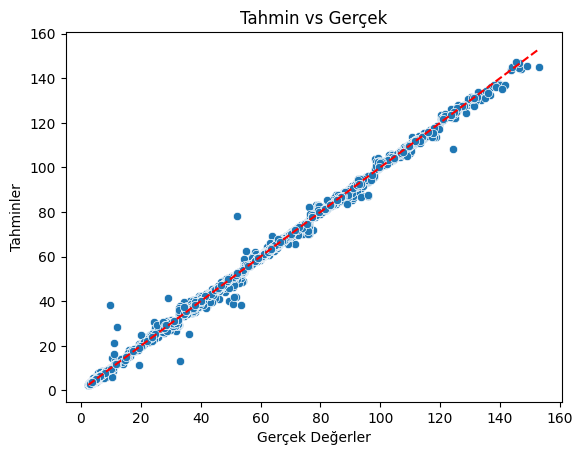

In [72]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Tahmin vs Gerçek")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal çizgi
plt.show();
# Gerçek değerler ve modelin tahmin ettiği değerler için scatter plot çizdiriyoruz.
# Grafiğin x ekseninde bulunan başlığını yazıyoruz.
# Grafiğin y ekseninde bulunan başlığını yazıyoruz.
# Grafiğin başlığını yazıyoruz.
# "ideal tahmin" çizgisi çizdiriyoruz.
# Grafiği ekrana yazdırıyoruz.

- Noktaların büyük çoğunluğu kırmızı çizgiye oldukça yakın olduğunu gözlemliyoruz. Bu, modelin genellikle doğru tahminler yaptığını gösterir.
- Düşük değerlerde saçılmış noktalar gözlemliyoruz. Modelin küçük değerleri tahmin etmede zorlandığı yorumunu yapabiliriz.

In [73]:
data = {
    "Eğitim": (y_train, rf_tuned.predict(X_train)),
    "Test": (y_test, rf_tuned.predict(X_test))
}

results = []

for set_name, (y_true, y_pred) in data.items():
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    # Hata metriklerini hesapllıyoruz
    results.append({
        "Set": set_name,
        "R2 Skoru": r2,
        "RMSE": rmse,
        "MAE": mae
    })
    # Çıkan sonuçları listeye ekliyoruz.
df_results = pd.DataFrame(results).set_index("Set").T
# Sonuçları df'e aktarıp, "Set" isimlerini index yapıyoruz ve son olarak tablonun transpoze ediyoruz.

In [74]:
df_results

Set,Eğitim,Test
R2 Skoru,0.999864,0.999067
RMSE,0.389778,1.029845
MAE,0.123169,0.325761


- R2 Skoru: Modelin açıklayıcılık oranı.
- RMSE: Karekök Ortalama Hata -> büyük hatalara daha duyarlıdır.
- MAE: Ortalama mutlak hata -> her tahminin hatasına eşit derecede bakar.

- R² Skoru | Train - 0.999864 | Test - 0.999067
  - Hem eğitimde hem testte %99.9 doğrulukla tahmin yapıyor. Model veriyi iyi öğrenmiştir ve genelleme yeteneği yüksektir.
- RMSE | Train - 0.389778 | Test - 1.029845
  - Test RMSE'si biraz yüksektir.
- MAE | Train - 0.123169 | Test - 0.325761
  - Modelin yaptığı tipik hata oldukça küçüktür.